In [31]:
%matplotlib inline
import matplotlib 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
from dateutil import parser
import datetime
import pytz

localtz = pytz.timezone('US/Eastern')

sns.set(style='white', palette='Set2')

df = pd.read_pickle('full_mlarray.pkl')
df.index = df.index.tz_convert('US/Eastern')

as_breaktime = datetime.datetime(2016,5,23,21,40)

print df.columns.values

['alphaS3_aux' 'pressureWind' 'alphaS1_aux' 'alphaS2_aux' 'sharpDust'
 'alphaS3_work' 'alphaS2_work' 'alphaS1_work' 'alphaTemp'
 'min_since_plugged_in' 'Battery ( %)' 'Humidity ( % RAW)' 'Noise ( mV)'
 'Temperature ( C RAW)' 'Light ( lx)' 'Nitrogen Dioxide ( kOhm)'
 'Carbon Monxide ( kOhm)' 'Solar Panel ( V)' 'wd' 'ws'
 u'forecastio_apparentTemperature' u'forecastio_cloudCover'
 u'forecastio_dewPoint' u'forecastio_humidity'
 u'forecastio_precipIntensity' u'forecastio_precipProbability'
 u'forecastio_pressure' u'forecastio_temperature' u'forecastio_visibility'
 u'forecastio_windBearing' u'forecastio_windSpeed' 'forecastio_clear-night'
 'forecastio_clear-day' 'forecastio_partly-cloudy-day'
 'forecastio_partly-cloudy-night' 'forecastio_cloudy' 'forecastio_rain'
 'forecastio_fog' 'forecastio_wind' 'scaled_arduino_ws'
 'avg_30_scaled_arduino_ws' 'avg_30_ws' 'hour_of_day' 'day_of_year'
 'morning' 'afternoon' 'evening' 'morning_rush' 'lunch' 'evening_rush'
 'day' 'night' 'as_temperature' 'avg

In [32]:
#add EPA values for co/o3

def dateparse (timestamp):    
    return parser.parse(timestamp)

epa_coo3_min = pd.read_csv('/Users/davidramsay/Documents/thesis/arduinoDataSafe/cleanedData/EPA/042516/coando3042516.csv', parse_dates=True, index_col=0, skiprows=[0,1], names=['timestamp','co','o3'])
epa2_coo32_min = pd.read_csv('/Users/davidramsay/Documents/thesis/arduinoDataSafe/cleanedData/EPA/052316/coando3052316.csv', parse_dates=True, index_col=0, skiprows=[0,1], names=['timestamp','co','o3'])
epa3_coo33_min = pd.read_csv('/Users/davidramsay/Documents/thesis/arduinoDataSafe/cleanedData/EPA/061316arduino/coando3061316.csv', parse_dates=True, index_col=0, skiprows=[0,1], names=['timestamp','co','o3'])

#strip whitespace from headings
epa_coo3_min.rename(columns=lambda x: x.strip(), inplace=True)
epa2_coo32_min.rename(columns=lambda x: x.strip(), inplace=True)
epa3_coo33_min.rename(columns=lambda x: x.strip(), inplace=True)

epa_co_o3 = pd.concat([epa_coo3_min, epa2_coo32_min, epa3_coo33_min])
epa_co_o3.index = epa_co_o3.index.tz_localize('US/Eastern')

print len(df)
print len(epa_co_o3)

df = pd.concat([df, epa_co_o3], axis=1, join_axes=[df.index])
df.head()

85739
85739


,alphaS3_aux,pressureWind,alphaS1_aux,alphaS2_aux,sharpDust,alphaS3_work,alphaS2_work,alphaS1_work,alphaTemp,min_since_plugged_in,...,as_no2,avg_10_as_o3,avg_15_as_co,avg_15_as_no2,avg_60_as_co,avg_60_as_no2,avg_360_as_co,avg_360_as_no2,co,o3
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-04-15 06:13:00-04:00,177.000000,0.000000,984.000000,6.000000,817.000000,975.000000,975.000000,973.000000,62.000000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.63,24.3
2016-04-15 06:14:00-04:00,68.054858,31067.307210,806.095592,5.330721,242.771158,261.446702,979.653605,977.322884,61.669279,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.76,24.0
2016-04-15 06:15:00-04:00,50.000000,31016.921631,273.470213,6.000000,210.751566,90.444356,983.673197,214.528990,61.673197,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262.03,23.2
2016-04-15 06:16:00-04:00,49.000000,31011.520378,173.959244,6.000000,196.072104,70.062695,983.000000,121.833853,61.000000,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.47,22.7
2016-04-15 06:17:00-04:00,48.318966,30948.793120,131.215514,6.000000,198.043103,64.362069,983.318966,101.086206,61.000000,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.19,23.9


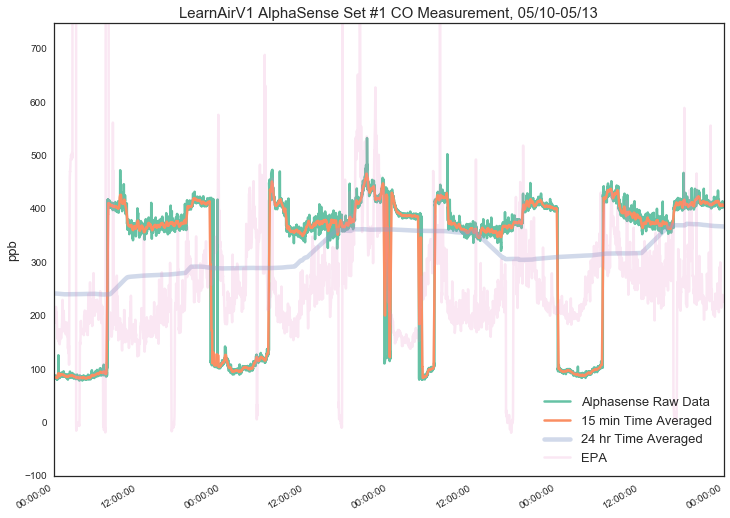

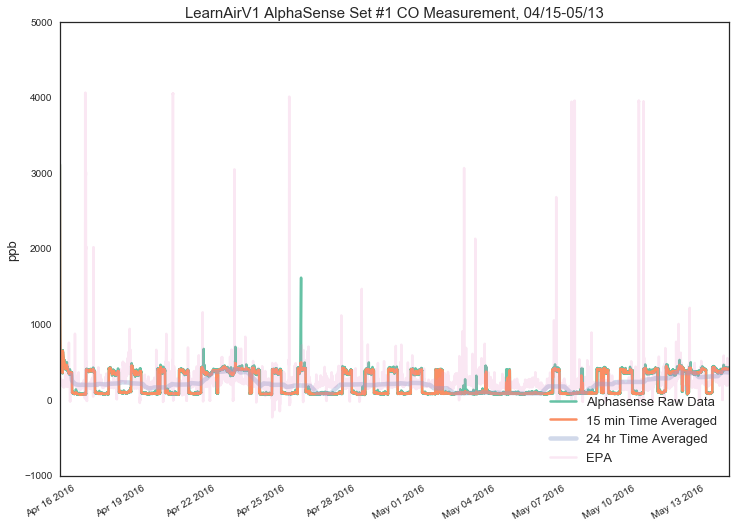

In [52]:
#co values - 
#    alphasense 'as_co' 
#    smartcitizen 'Carbon Monxide ( kOhm)'
#    epa 'co'

#need to calibrate alphasense, smartcitizen, then generate 10% accuracy plots


#1: JUSTIFY/ADD IN 15 MIN ROLLING AVERAGE FOR ALPHASENSE DATA


starttime = datetime.datetime(2016,5,10)
endtime = datetime.datetime(2016,5,14)

value1 = 'as_co'
value2 = 'avg_15_as_co'
value3 = 'avg_1440_as_co'
value4 = 'co'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values, lw=2.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value3].values, lw=4.5, alpha=.4)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value4].values, lw=2.5, alpha=.2)

plt.legend(['Alphasense Raw Data', '15 min Time Averaged','24 hr Time Averaged', 'EPA'], fontsize=13, loc=4 )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 AlphaSense Set #1 CO Measurement, 05/10-05/13', fontsize=15)
plt.ylim(-100,750)
plt.savefig('./figs/as_co_raw_zoomed.png', bbox_inches='tight', dpi=200)


starttime = datetime.datetime(2016,4,15)
endtime = datetime.datetime(2016,5,14)




value1 = 'as_co'
value2 = 'avg_15_as_co'
value3 = 'avg_1440_as_co'
value4 = 'co'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values, lw=2.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value3].values, lw=4.5, alpha=.4)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value4].values, lw=2.5, alpha=.2)

plt.legend(['Alphasense Raw Data', '15 min Time Averaged','24 hr Time Averaged', 'EPA'], fontsize=13, loc=4 )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 AlphaSense Set #1 CO Measurement, 04/15-05/13', fontsize=15)

plt.savefig('./figs/as_co_raw.png', bbox_inches='tight', dpi=200)

#we can see serious quantization issues here with the trace CO.  We will do a typical learning style on the averaged
#data, but to give the alphasense sensor a fair shake (not dependent on dynamic range/ADC error from 10 bit arduino)
#we'll also call things 'right' if they are in the correct bin.  Looking at this plot, we can see quantization at 
#100 and 400 ppb.  Assuming this gap of 300, we'll call it 'accurate' if it's within 150 ppb of the actual value
#(the quantization level) for the raw signal, and see what we get.

COBYLA minimization= [ 0.67777064  2.11416828]

TNC minimization= [   0.5         125.35555741]

Inequality constraints incompatible    (Exit mode 4)
            Current function value: 5250057723.44
            Iterations: 1
            Function evaluations: 4
            Gradient evaluations: 1
SLSQP minimization= [ 1.  0.]

original rmse = 307.317724226
after optimization rmse = 293.189014515
COBYLA minimization= [ 0.69415238  2.11279333]

TNC minimization= [   0.5         125.55513376]

Inequality constraints incompatible    (Exit mode 4)
            Current function value: 5146102022.93
            Iterations: 1
            Function evaluations: 4
            Gradient evaluations: 1
SLSQP minimization= [ 1.  0.]

original rmse = 304.259932953
after optimization rmse = 291.753513267


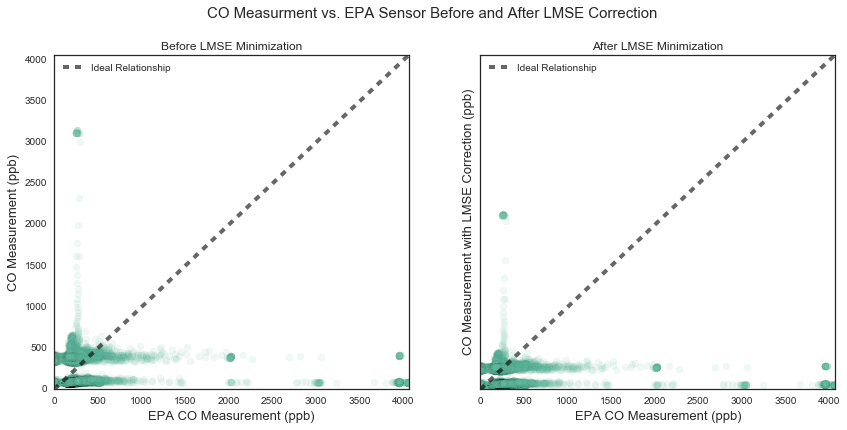

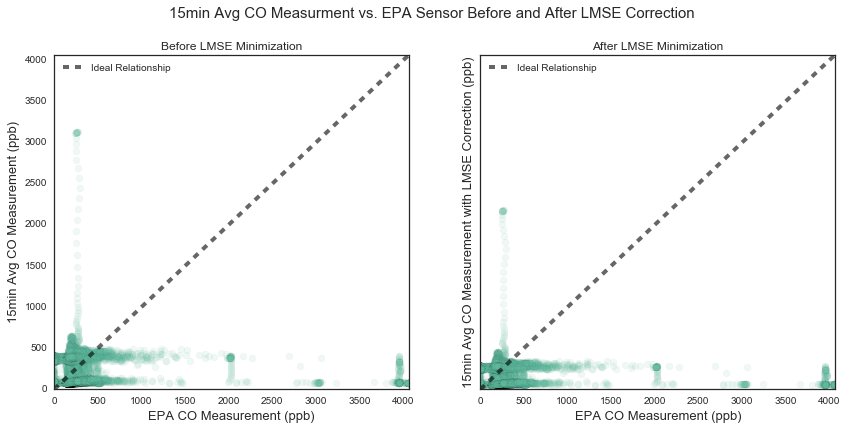

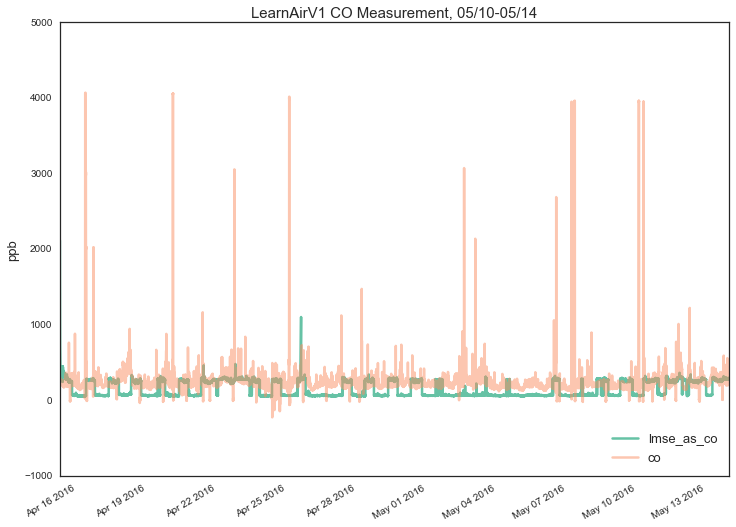

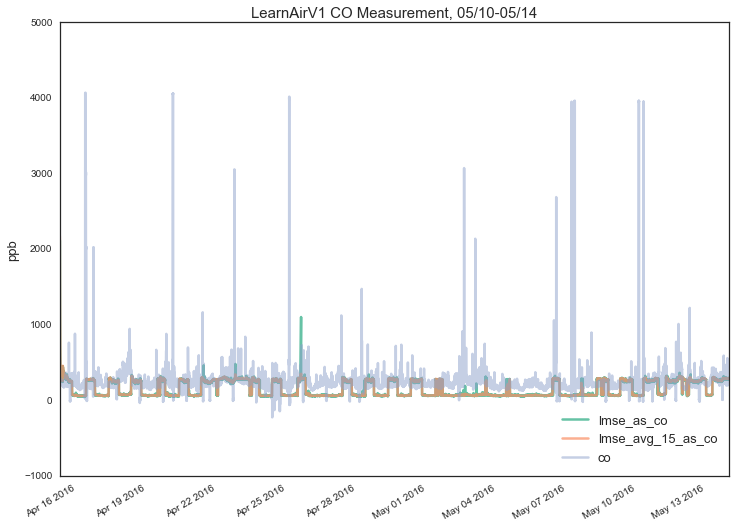

In [28]:
#3 LMSE ALPHASENSE CO SET #1 DATA RAW 
#RMS fit - scale factor and offset
#NOT USEFUL - drop columns

#find a,b where we minimize sqrt( sum((a*scaled_ws+b)-ws)^2 / n ), same as minimzing sum((a*scaled_ws+b)-ws)^2 

ref_col = 'co'
scaled_col = 'as_co'
new_col = 'lmse_as_co'

bnds = ((0.5, 1.5), (-200, 200))

import math
from scipy.optimize import minimize

total_rmse = math.sqrt( np.nansum((df.loc[:as_breaktime, scaled_col].values - df.loc[:as_breaktime, ref_col].values)**2) / len(df.ix[:as_breaktime]) )

def minimize_me(x):
    return np.nansum(((x[0]*df.loc[:as_breaktime, scaled_col].values + x[1]) - df.loc[:as_breaktime, ref_col].values)**2)

x0 = np.array([1.,0.])
res = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'disp': True})
print('COBYLA minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res3.x)

df.loc[:as_breaktime, new_col] = df.loc[:as_breaktime, scaled_col]*res.x[0]+res.x[1]





xmin=0
xmax=df.loc[:as_breaktime, ref_col].max()

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(14,6))
plt.sca(ax1)
sns.regplot(ref_col, scaled_col, data=df.ix[:as_breaktime], ax=ax1, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('CO Measurement (ppb)', fontsize=13)
plt.xlabel('EPA CO Measurement (ppb)', fontsize=13)
plt.title('Before LMSE Minimization')


total_rmse = math.sqrt( np.nansum((df.loc[:as_breaktime, scaled_col].values - df.loc[:as_breaktime, ref_col].values)**2) / len(df.ix[:as_breaktime]) )
print 'original rmse = %s' % total_rmse

plt.sca(ax2)
sns.regplot(ref_col, new_col, data=df.ix[:as_breaktime], ax=ax2, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('CO Measurement with LMSE Correction (ppb)', fontsize=13)
plt.xlabel('EPA CO Measurement (ppb)', fontsize=13)
plt.title('After LMSE Minimization')

fig.suptitle('CO Measurment vs. EPA Sensor Before and After LMSE Correction', y=1.01, fontsize=15)

total_rmse = math.sqrt( np.nansum((df.loc[:as_breaktime, new_col].values - df.loc[:as_breaktime, ref_col].values)**2) / len(df.ix[:as_breaktime]) )
print 'after optimization rmse = %s' % total_rmse





ref_col = 'co'
scaled_col = 'avg_15_as_co'
new_col = 'lmse_avg_15_as_co'

total_rmse = math.sqrt( np.nansum((df.loc[:as_breaktime, scaled_col].values - df.loc[:as_breaktime, ref_col].values)**2) / len(df.ix[:as_breaktime]) )

def minimize_me(x):
    return np.nansum(((x[0]*df.loc[:as_breaktime, scaled_col].values + x[1]) - df.loc[:as_breaktime, ref_col].values)**2)

x0 = np.array([1.,0.])
res = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'disp': True})
print('COBYLA minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res3.x)

df.loc[:as_breaktime, new_col] = df.loc[:as_breaktime, scaled_col]*res.x[0]+res.x[1]





xmin=0
xmax=df.loc[:as_breaktime, ref_col].max()

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(14,6))
plt.sca(ax1)
sns.regplot(ref_col, scaled_col, data=df.ix[:as_breaktime], ax=ax1, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('15min Avg CO Measurement (ppb)', fontsize=13)
plt.xlabel('EPA CO Measurement (ppb)', fontsize=13)
plt.title('Before LMSE Minimization')


total_rmse = math.sqrt( np.nansum((df.loc[:as_breaktime, scaled_col].values - df.loc[:as_breaktime, ref_col].values)**2) / len(df.ix[:as_breaktime]) )
print 'original rmse = %s' % total_rmse

plt.sca(ax2)
sns.regplot(ref_col, new_col, data=df.ix[:as_breaktime], ax=ax2, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('15min Avg CO Measurement with LMSE Correction (ppb)', fontsize=13)
plt.xlabel('EPA CO Measurement (ppb)', fontsize=13)
plt.title('After LMSE Minimization')

fig.suptitle('15min Avg CO Measurment vs. EPA Sensor Before and After LMSE Correction', y=1.01, fontsize=15)

total_rmse = math.sqrt( np.nansum((df.loc[:as_breaktime, new_col].values - df.loc[:as_breaktime, ref_col].values)**2) / len(df.ix[:as_breaktime]) )
print 'after optimization rmse = %s' % total_rmse




starttime = datetime.datetime(2016,4,15)
endtime = datetime.datetime(2016,5,14)

value1 = 'lmse_as_co'
value2 = 'lmse_avg_15_as_co'
value3 = 'co'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values, lw=2.5, alpha=0.7)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value3].values, lw=2.5, alpha=0.5)
    
plt.legend([value1, value2, value3], fontsize=13, loc=4 )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 CO Measurement, 05/10-05/14', fontsize=15)





df.drop('lmse_as_co', axis=1, inplace=True)
df.drop('lmse_avg_15_as_co', axis=1, inplace=True)


mean = 233.409404867, std = 164.090948076
mean = 233.022653472, std = 158.264851843
mean = 242.058653846, std = 256.483220145
COBYLA minimization= [ 0.75178538  2.80805599]

TNC minimization= [   0.5         123.96996814]

Inequality constraints incompatible    (Exit mode 4)
            Current function value: 1041433813.34
            Iterations: 1
            Function evaluations: 4
            Gradient evaluations: 1
SLSQP minimization= [ 1.  0.]

original rmse = 307.317724226
after optimization rmse = 293.797160914
COBYLA minimization= [ 0.8123694  3.0363391]

TNC minimization= [   0.5         130.77696483]

Inequality constraints incompatible    (Exit mode 4)
            Current function value: 916253118.769
            Iterations: 1
            Function evaluations: 4
            Gradient evaluations: 1
SLSQP minimization= [ 1.  0.]

original rmse = 304.259932953
after optimization rmse = 293.48939274


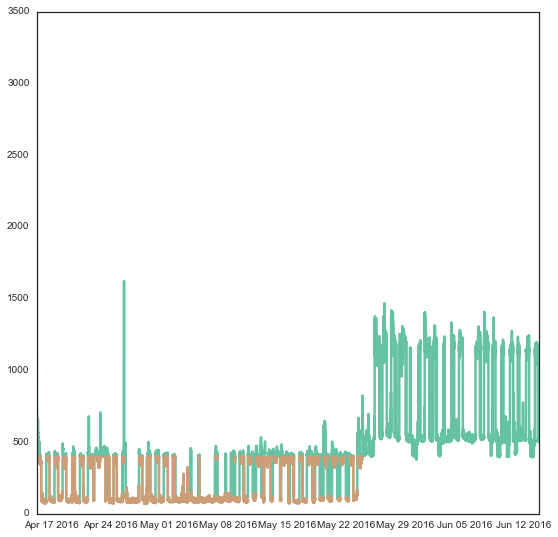

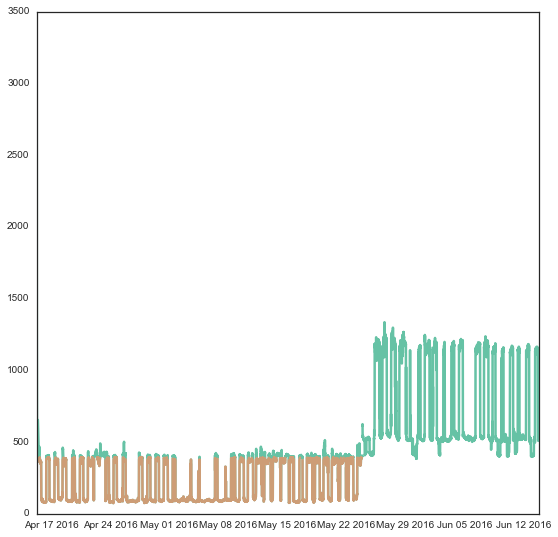

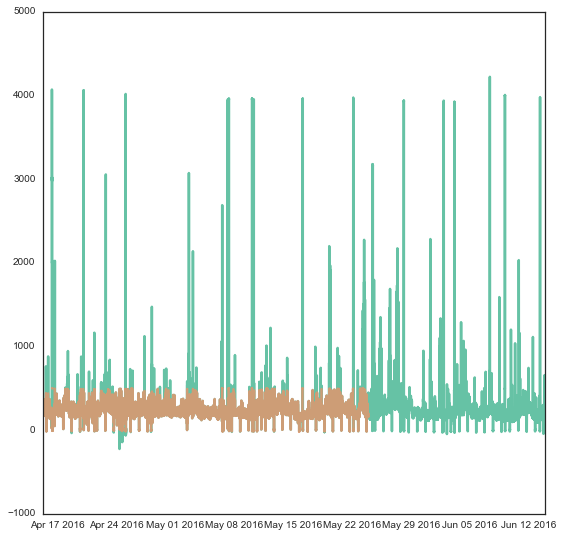

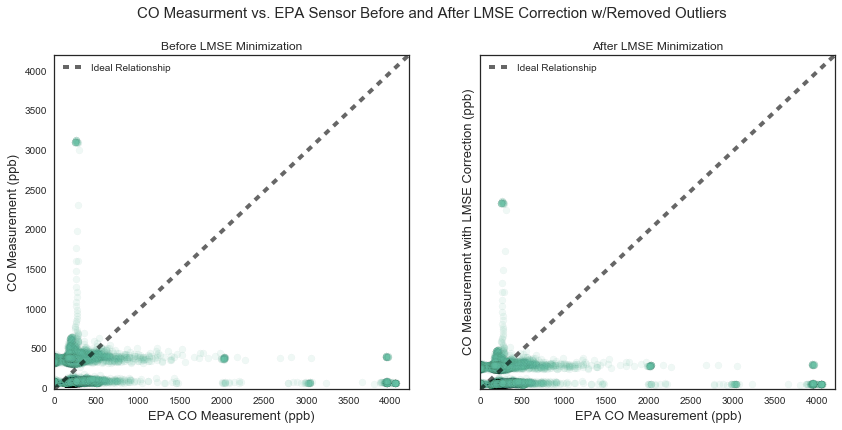

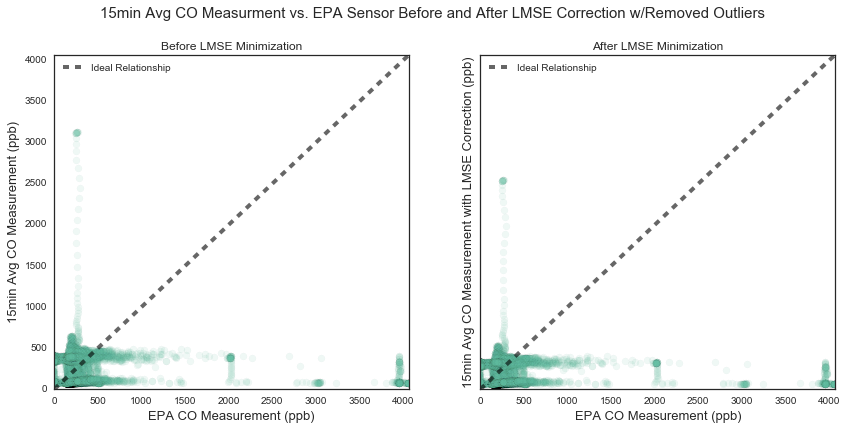

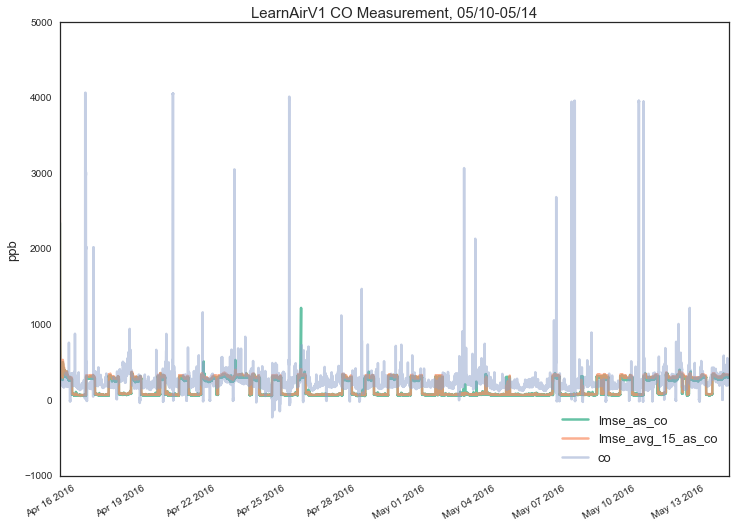

In [29]:
#3 LMSE ALPHASENSE CO SET #1 DATA RAW REMOVING ANYTHING OUTSIDE 1 STDEV (NO OUTLIERS) 
#RMS fit - scale factor and offset
#NOT USEFUL - drop columns

#SAME AS PREVIOUS BLOCK - this time we're trying throwing away outliers- only using values 1 stdev from mean 
# in each set as training data for RMS error, to mitigate effects of big spikes
#still bounded, still scale and offset, still not great

#could just LMSE scale and offset

#RMS fit - scale factor and offset

#go through each as_co, avg_15_as_co, and co, find mean/stdev, and replace anything above 1 stdev with np.nan
cols = ['as_co', 'avg_15_as_co', 'co']

for col in cols:
    mean = df.loc[:as_breaktime, col].mean()
    stdev = df.loc[:as_breaktime, col].std()
    print 'mean = %s, std = %s' % (mean, stdev)
    
    df.loc[:as_breaktime, col + '_removedoutliers'] = [val if val > mean-stdev and val < mean+stdev else np.nan for val in df.loc[:as_breaktime, col]]
    
    fig, ax = plt.subplots(figsize=(9, 9))
    plt.plot_date(df.index.values, df[col].values, tz=localtz, ls='solid', marker=None, lw=2.5)
    plt.plot(df.index.values, df[col + '_removedoutliers'].values, lw=2.5, alpha=.7) 


    
    
    
#find a,b where we minimize sqrt( sum((a*scaled_ws+b)-ws)^2 / n ), same as minimzing sum((a*scaled_ws+b)-ws)^2 

ref_col = 'co'
scaled_col = 'as_co'
new_col = 'lmse_as_co'

bnds = ((0.5, 1.5), (-200, 200))

import math
from scipy.optimize import minimize

total_rmse = math.sqrt( np.nansum((df.loc[:as_breaktime, scaled_col].values - df.loc[:as_breaktime, ref_col].values)**2) / len(df.ix[:as_breaktime]) )

def minimize_me(x):
    return np.nansum(((x[0]*df.loc[:as_breaktime, scaled_col + '_removedoutliers'].values + x[1]) - df.loc[:as_breaktime, ref_col + '_removedoutliers'].values)**2)

x0 = np.array([1.,0.])
res = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'disp': True})
print('COBYLA minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res3.x)

df.loc[:as_breaktime, new_col] = df.loc[:as_breaktime, scaled_col]*res.x[0]+res.x[1]






xmin=0
xmax=df[ref_col].max()

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(14,6))
plt.sca(ax1)
sns.regplot(ref_col, scaled_col, data=df.ix[:as_breaktime], ax=ax1, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('CO Measurement (ppb)', fontsize=13)
plt.xlabel('EPA CO Measurement (ppb)', fontsize=13)
plt.title('Before LMSE Minimization')


total_rmse = math.sqrt( np.nansum((df.loc[:as_breaktime, scaled_col].values - df.loc[:as_breaktime, ref_col].values)**2) / len(df.ix[:as_breaktime]) )
print 'original rmse = %s' % total_rmse

plt.sca(ax2)
sns.regplot(ref_col, new_col, data=df.ix[:as_breaktime], ax=ax2, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('CO Measurement with LMSE Correction (ppb)', fontsize=13)
plt.xlabel('EPA CO Measurement (ppb)', fontsize=13)
plt.title('After LMSE Minimization')

fig.suptitle('CO Measurment vs. EPA Sensor Before and After LMSE Correction w/Removed Outliers', y=1.01, fontsize=15)

total_rmse = math.sqrt( np.nansum((df.loc[:as_breaktime, new_col].values - df.loc[:as_breaktime, ref_col].values)**2) / len(df.ix[:as_breaktime]) )
print 'after optimization rmse = %s' % total_rmse






ref_col = 'co'
scaled_col = 'avg_15_as_co'
new_col = 'lmse_avg_15_as_co'

total_rmse = math.sqrt( np.nansum((df.loc[:as_breaktime, scaled_col].values - df.loc[:as_breaktime, ref_col].values)**2) / len(df.ix[:as_breaktime]) )

def minimize_me(x):
    return np.nansum(((x[0]*df.loc[:as_breaktime, scaled_col + '_removedoutliers'].values + x[1]) - df.loc[:as_breaktime, ref_col + '_removedoutliers'].values)**2)

x0 = np.array([1.,0.])
res = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'disp': True})
print('COBYLA minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res3.x)

df.loc[:as_breaktime, new_col] = df.loc[:as_breaktime, scaled_col]*res.x[0]+res.x[1]





xmin=0
xmax=df.loc[:as_breaktime, ref_col].max()

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(14,6))
plt.sca(ax1)
sns.regplot(ref_col, scaled_col, data=df.ix[:as_breaktime], ax=ax1, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('15min Avg CO Measurement (ppb)', fontsize=13)
plt.xlabel('EPA CO Measurement (ppb)', fontsize=13)
plt.title('Before LMSE Minimization')


total_rmse = math.sqrt( np.nansum((df.loc[:as_breaktime, scaled_col].values - df.loc[:as_breaktime, ref_col].values)**2) / len(df.ix[:as_breaktime]) )
print 'original rmse = %s' % total_rmse

plt.sca(ax2)
sns.regplot(ref_col, new_col, data=df.ix[:as_breaktime], ax=ax2, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('15min Avg CO Measurement with LMSE Correction (ppb)', fontsize=13)
plt.xlabel('EPA CO Measurement (ppb)', fontsize=13)
plt.title('After LMSE Minimization')

fig.suptitle('15min Avg CO Measurment vs. EPA Sensor Before and After LMSE Correction w/Removed Outliers', y=1.01, fontsize=15)

total_rmse = math.sqrt( np.nansum((df.loc[:as_breaktime, new_col].values - df.loc[:as_breaktime, ref_col].values)**2) / len(df.ix[:as_breaktime]) )
print 'after optimization rmse = %s' % total_rmse


starttime = datetime.datetime(2016,4,15)
endtime = datetime.datetime(2016,5,14)


value1 = 'lmse_as_co'
value2 = 'lmse_avg_15_as_co'
value3 = 'co'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values, lw=2.5, alpha=0.7)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value3].values, lw=2.5, alpha=0.5)
    
plt.legend([value1, value2, value3], fontsize=13, loc=4 )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 CO Measurement, 05/10-05/14', fontsize=15)





df.drop('lmse_as_co', axis=1, inplace=True)
df.drop('lmse_avg_15_as_co', axis=1, inplace=True)


for col in cols:
    df.drop(col + '_removedoutliers', axis=1, inplace=True)




COBYLA minimization= [ 256.32231112  279.5021026     0.48128201    2.19015851]

TNC minimization= [ 257.57442417  277.41813789    0.4          53.22410685]

Inequality constraints incompatible    (Exit mode 4)
            Current function value: 5250057723.44
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1
SLSQP minimization= [ 258.    277.      0.32    0.  ]

original rmse = 307.317724226
after optimization rmse = 290.800707332


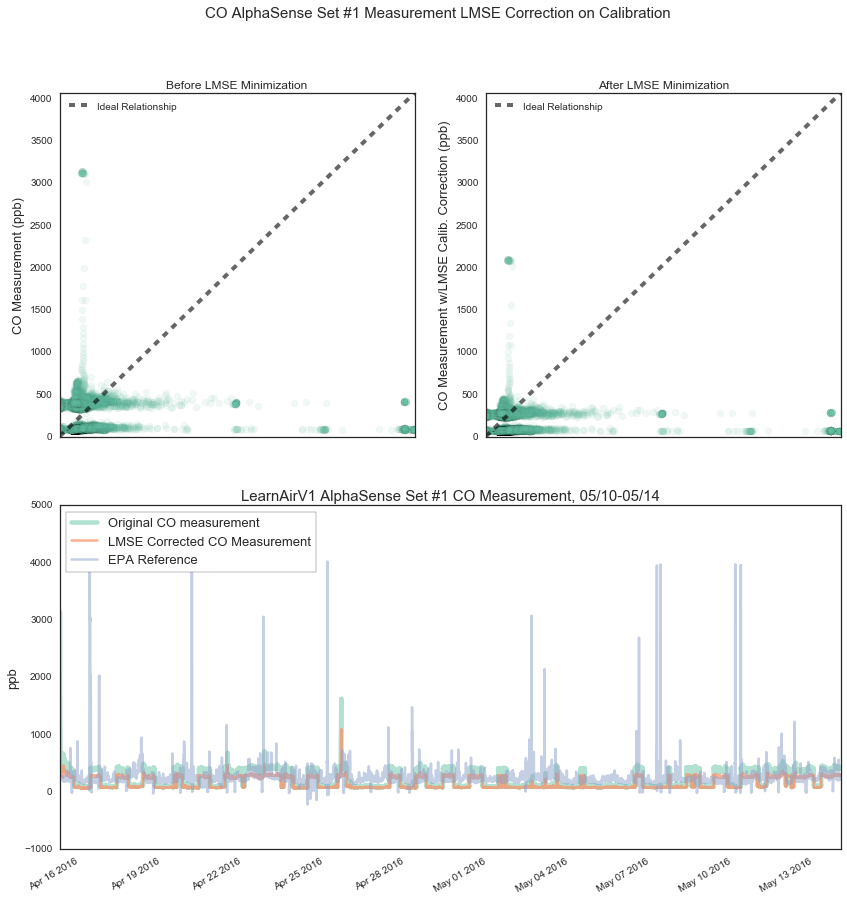

In [75]:
#3 LMSE ALPHASENSE CO SET #1 CALIBRATION STYLE (Minimize the calibration electrode values) 
#RMS fit - scale factor and offset


#previous standard LMSE calibration total garbage, even with bounds.  Let's do calibration LMSE.

#4 LMSE ALPHASENSE SET #1 CALIBRATION

'''
we_zero = 258.0 #mV
ae_zero = 277.0 #mV
sensitivity = 0.320 #mV/ppb
'''

MINIMIZE_SENSITIVITY = True #can just minimize electrode offsets- this includes sensitivity in minimization if true

sensitivity = 0.320 #mV/ppb
n_temps = [15, 25] #degrees C that seperate n regimes
n= [1.0, -1.0, -.76] #n values that correspond to n_temps [<n_temps[0], between n_temps[0],n_temps[1], >n_temps[1]]

def compute_co_val(n_temps, n, temp, we, we_zero, ae, ae_zero, sensitivity):
    if temp < n_temps[0]:
        return ((we - we_zero) - (n[0]*ae - ae_zero)) / sensitivity
    elif temp < n_temps[1]:
        return ((we - we_zero) - (n[1]*ae - ae_zero)) / sensitivity
    else:
        return ((we - we_zero) - (n[2]*ae - ae_zero)) / sensitivity

ref_col = 'co'
new_col = 'lmse_calib_as_co'

import math
from scipy.optimize import minimize

total_rmse = math.sqrt( np.nansum((df.loc[:as_breaktime, 'as_co'].values - df.loc[:as_breaktime, ref_col].values)**2) / len(df.ix[:as_breaktime]) )

def minimize_me(x):
    if MINIMIZE_SENSITIVITY:
        return np.nansum(([compute_co_val(n_temps, n, temp, we, x[0], ae, x[1], x[2]) + x[3] for we, ae, temp in \
                     zip(df.loc[:as_breaktime,'alphaS2_work'], df.loc[:as_breaktime,'alphaS2_aux'], df.loc[:as_breaktime,'avg_15_as_temperature'])]- df.loc[:as_breaktime, ref_col].values)**2)
    else:
        return np.nansum(([compute_co_val(n_temps, n, temp, we, x[0], ae, x[1], sensitivity) for we, ae, temp in \
                     zip(df.loc[:as_breaktime,'alphaS2_work'], df.loc[:as_breaktime,'alphaS2_aux'], df.loc[:as_breaktime,'avg_15_as_temperature'])]- df.loc[:as_breaktime, ref_col].values)**2)

if MINIMIZE_SENSITIVITY:
    x0 = np.array([258.,277.,0.32, 0])
    bnds = ((210, 310), (230, 330), (0.2,0.4), (-1000,1000))
else:
    x0 = np.array([258.,277.])
    bnds = ((210, 310), (230, 330))


res = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'disp': True})
print('COBYLA minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res3.x)

if MINIMIZE_SENSITIVITY:
    df.loc[:as_breaktime, new_col] = [compute_co_val(n_temps, n, temp, we, res.x[0], ae, res.x[1], res.x[2]) + res.x[3] \
                    for we, ae, temp in zip(df.loc[:as_breaktime,'alphaS2_work'], df.loc[:as_breaktime,'alphaS2_aux'], df.loc[:as_breaktime,'avg_15_as_temperature'])]
else:
    df.loc[:as_breaktime, new_col] = [compute_co_val(n_temps, n, temp, we, res.x[0], ae, res.x[1], sensitivity) \
                    for we, ae, temp in zip(df.loc[:as_breaktime,'alphaS2_work'], df.loc[:as_breaktime,'alphaS2_aux'], df.loc[:as_breaktime,'avg_15_as_temperature'])]


    
    
    
    
xmin=0
xmax=df.loc[:as_breaktime, ref_col].max()

#fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(14,6))
fig = plt.figure(figsize=(14,15))
ax1 = plt.subplot2grid((2,2), (0,0))
ax2 = plt.subplot2grid((2,2), (0,1))
ax3 = plt.subplot2grid((2,2), (1,0), colspan=2)

plt.sca(ax1)
sns.regplot(ref_col, 'as_co', data=df.ix[:as_breaktime], ax=ax1, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('CO Measurement (ppb)', fontsize=13)
plt.xlabel('EPA CO Measurement (ppb)', fontsize=13)
plt.title('Before LMSE Minimization')

plt.sca(ax2)
sns.regplot(ref_col, new_col, data=df.ix[:as_breaktime], ax=ax2, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('CO Measurement w/LMSE Calib. Correction (ppb)', fontsize=13)
plt.xlabel('EPA CO Measurement (ppb)', fontsize=13)
plt.title('After LMSE Minimization')

fig.suptitle('CO AlphaSense Set #1 Measurement LMSE Correction on Calibration', fontsize=15)


total_rmse = math.sqrt( np.nansum((df.loc[:as_breaktime, 'as_co'].values - df.loc[:as_breaktime, ref_col].values)**2) / len(df.ix[:as_breaktime]) )
print 'original rmse = %s' % total_rmse

total_rmse = math.sqrt( np.nansum((df.loc[:as_breaktime, new_col].values - df.loc[:as_breaktime, ref_col].values)**2) / len(df.ix[:as_breaktime]) )
print 'after optimization rmse = %s' % total_rmse




starttime = datetime.datetime(2016,4,15)
endtime = datetime.datetime(2016,5,14)

value1 = 'as_co'
value2 = 'lmse_calib_as_co'
value3 = 'co'

#fig = plt.figure(figsize=(12, 9))  
#ax = plt.subplot(111)  
plt.sca(ax3)
fig.autofmt_xdate()
ax3.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, tz=localtz, ls='solid', marker=None, lw=4.5, alpha=.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values, lw=2.5, alpha=0.7)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value3].values, lw=2.5, alpha=0.5)
    
plt.legend(['Original CO measurement', 'LMSE Corrected CO Measurement', 'EPA Reference'], fontsize=13, loc=2, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 AlphaSense Set #1 CO Measurement, 05/10-05/14', fontsize=15)

plt.savefig('./figs/as1_co_lmse.png', bbox_inches='tight', dpi=200)


COBYLA minimization= [  4.86394990e+02   4.16514386e+02  -4.01875753e-01   4.98527181e+02]

TNC minimization= [  4.68091436e+02   4.34127147e+02  -4.00000000e-01   4.71460979e+02]

Inequality constraints incompatible    (Exit mode 4)
            Current function value: 4601288452.65
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1
SLSQP minimization= [  4.88000000e+02   4.14000000e+02  -2.14000000e-01   5.00000000e+02]

original rmse = 307.317724226
after optimization rmse = 290.800707332


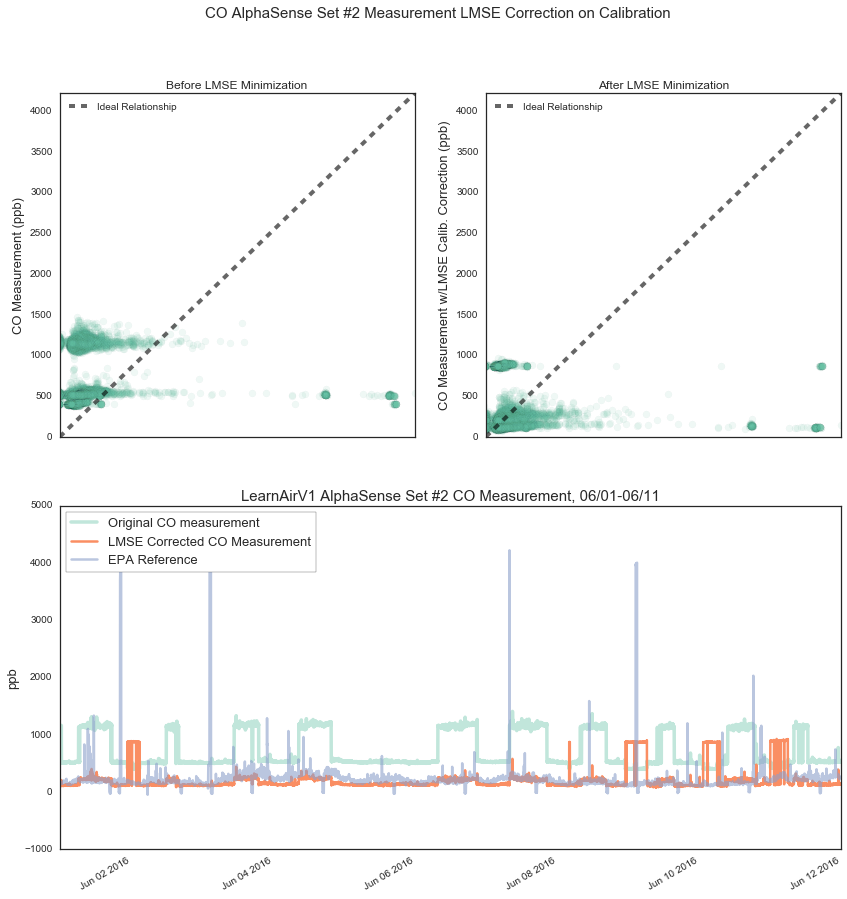

In [76]:
#3 LMSE ALPHASENSE CO SET #2 CALIBRATION STYLE (Minimize the calibration electrode values) 
#RMS fit - scale factor and offset



#4 LMSE ALPHASENSE SET #2 CALIBRATION

'''
we_zero = 488.0 #mV
ae_zero = 414.0 #mV
sensitivity = -0.214 #mV/ppb
'''

MINIMIZE_SENSITIVITY = True #can just minimize electrode offsets- this includes sensitivity in minimization if true

sensitivity = -0.214 #mV/ppb
n_temps = [15, 25] #degrees C that seperate n regimes
n= [1.0, -1.0, -.76] #n values that correspond to n_temps [<n_temps[0], between n_temps[0],n_temps[1], >n_temps[1]]

def compute_co_val(n_temps, n, temp, we, we_zero, ae, ae_zero, sensitivity):
    if temp < n_temps[0]:
        return ((we - we_zero) - (n[0]*ae - ae_zero)) / sensitivity
    elif temp < n_temps[1]:
        return ((we - we_zero) - (n[1]*ae - ae_zero)) / sensitivity
    else:
        return ((we - we_zero) - (n[2]*ae - ae_zero)) / sensitivity

ref_col = 'co'
new_col = 'lmse_calib_as_co'

import math
from scipy.optimize import minimize

total_rmse = math.sqrt( np.nansum((df.loc[as_breaktime:, 'as_co'].values - df.loc[as_breaktime:, ref_col].values)**2) / len(df.ix[as_breaktime:]) )

def minimize_me(x):
    if MINIMIZE_SENSITIVITY:
        return np.nansum(([compute_co_val(n_temps, n, temp, we, x[0], ae, x[1], x[2]) + x[3] for we, ae, temp in \
                     zip(df.loc[as_breaktime:,'alphaS2_work'], df.loc[as_breaktime:,'alphaS2_aux'], df.loc[as_breaktime:,'avg_15_as_temperature'])]- df.loc[as_breaktime:, ref_col].values)**2)
    else:
        return np.nansum(([compute_co_val(n_temps, n, temp, we, x[0], ae, x[1], sensitivity) for we, ae, temp in \
                     zip(df.loc[as_breaktime:,'alphaS2_work'], df.loc[as_breaktime:,'alphaS2_aux'], df.loc[as_breaktime:,'avg_15_as_temperature'])]- df.loc[as_breaktime:, ref_col].values)**2)

if MINIMIZE_SENSITIVITY:
    x0 = np.array([488.,414.,-0.214,500.])
    bnds = ((250, 600), (250, 600), (-0.4,0.1), (0,1000))
else:
    x0 = np.array([488.,414.])
    bnds = ((250, 600), (250, 600))


res3 = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'disp': True})
print('COBYLA minimization= %s\n' % res3.x)

res2 = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res2.x)

res = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res.x)

if MINIMIZE_SENSITIVITY:
    df.loc[as_breaktime:, new_col] = [compute_co_val(n_temps, n, temp, we, res.x[0], ae, res.x[1], res.x[2]) + res.x[3] \
                    for we, ae, temp in zip(df.loc[as_breaktime:,'alphaS2_work'], df.loc[as_breaktime:,'alphaS2_aux'], df.loc[as_breaktime:,'avg_15_as_temperature'])]
else:
    df.loc[as_breaktime:, new_col] = [compute_co_val(n_temps, n, temp, we, res.x[0], ae, res.x[1], sensitivity) \
                    for we, ae, temp in zip(df.loc[as_breaktime:,'alphaS2_work'], df.loc[as_breaktime:,'alphaS2_aux'], df.loc[as_breaktime:,'avg_15_as_temperature'])]


    
    
    
    
xmin=0
xmax=df.loc[as_breaktime:, ref_col].max()

#fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(14,6))
fig = plt.figure(figsize=(14,15))
ax1 = plt.subplot2grid((2,2), (0,0))
ax2 = plt.subplot2grid((2,2), (0,1))
ax3 = plt.subplot2grid((2,2), (1,0), colspan=2)

plt.sca(ax1)
sns.regplot(ref_col, 'as_co', data=df.ix[as_breaktime:], ax=ax1, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('CO Measurement (ppb)', fontsize=13)
plt.xlabel('EPA CO Measurement (ppb)', fontsize=13)
plt.title('Before LMSE Minimization')

plt.sca(ax2)
sns.regplot(ref_col, new_col, data=df.ix[as_breaktime:], ax=ax2, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('CO Measurement w/LMSE Calib. Correction (ppb)', fontsize=13)
plt.xlabel('EPA CO Measurement (ppb)', fontsize=13)
plt.title('After LMSE Minimization')

fig.suptitle('CO AlphaSense Set #2 Measurement LMSE Correction on Calibration', fontsize=15)


total_rmse = math.sqrt( np.nansum((df.loc[:as_breaktime, 'as_co'].values - df.loc[:as_breaktime, ref_col].values)**2) / len(df.ix[:as_breaktime]) )
print 'original rmse = %s' % total_rmse

total_rmse = math.sqrt( np.nansum((df.loc[:as_breaktime, new_col].values - df.loc[:as_breaktime, ref_col].values)**2) / len(df.ix[:as_breaktime]) )
print 'after optimization rmse = %s' % total_rmse



starttime = datetime.datetime(2016,6,1)
endtime = datetime.datetime(2016,6,12)

value1 = 'as_co'
value2 = 'lmse_calib_as_co'
value3 = 'co'

#fig = plt.figure(figsize=(12, 9))  
#ax = plt.subplot(111)  
plt.sca(ax3)
fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, tz=localtz, ls='solid', marker=None, lw=3.5, alpha=0.4)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values, lw=2.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value3].values, lw=2.5, alpha=0.6)
    
plt.legend(['Original CO measurement', 'LMSE Corrected CO Measurement', 'EPA Reference'], fontsize=13, loc=2, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 AlphaSense Set #2 CO Measurement, 06/01-06/11', fontsize=15)

plt.savefig('./figs/as2_co_lmse.png', bbox_inches='tight', dpi=200)

In [78]:
averages = [15, 60*24]

for num_avg in averages:

    ref_col = 'lmse_calib_as_co'
    avg_col= 'avg_' + str(num_avg) + '_' + ref_col
    df[avg_col] = df[ref_col].rolling(window=num_avg, center=True).mean()


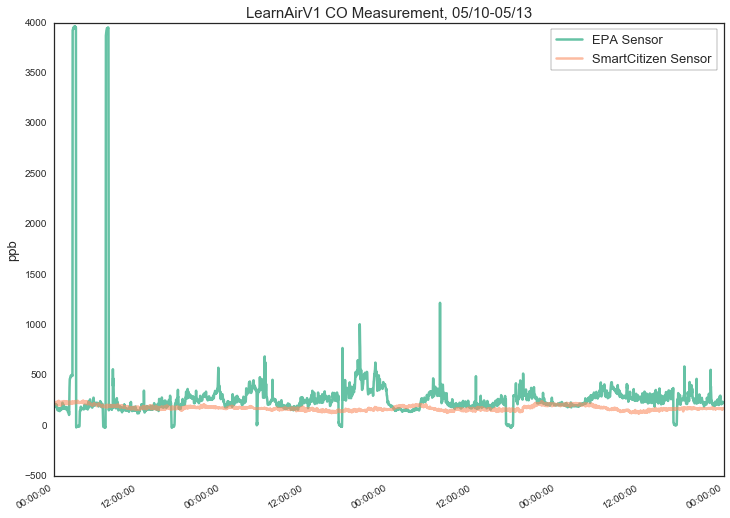

In [81]:
#2: PLOT OF RAW DATA

starttime = datetime.datetime(2016,5,10)
endtime = datetime.datetime(2016,5,14)

value1 = 'co'
value2 = 'Carbon Monxide ( kOhm)'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
if value2 is not None:
    plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values, lw=2.5, alpha=0.6)
   
plt.legend(['EPA Sensor', 'SmartCitizen Sensor'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 CO Measurement, 05/10-05/13', fontsize=15)

plt.savefig('./figs/co_sck_zoomed.png', bbox_inches='tight', dpi=200)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:23: OptimizeWarning: Unknown solver options: xtol


COBYLA minimization= [   9.96602675  199.65254554   -2.1476203 ]

TNC minimization= [   2.         -121.60528001    0.        ]

Inequality constraints incompatible    (Exit mode 4)
            Current function value: 2.20064617147e+12
            Iterations: 1
            Function evaluations: 5
            Gradient evaluations: 1
SLSQP minimization= [  10.  200.    1.]

original rmse = 266.935817176
after optimization rmse = 261.516581213


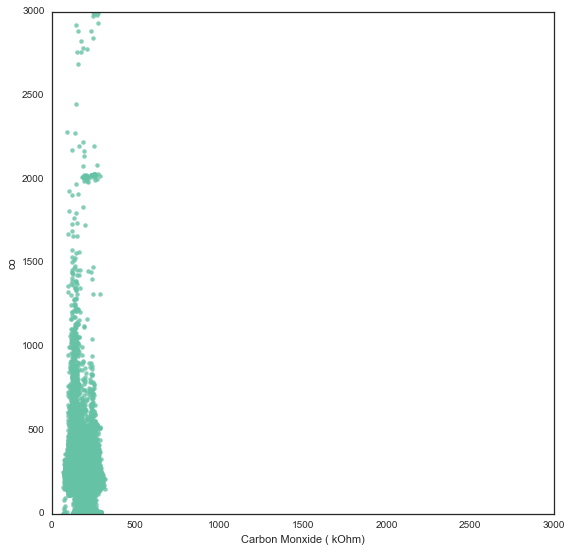

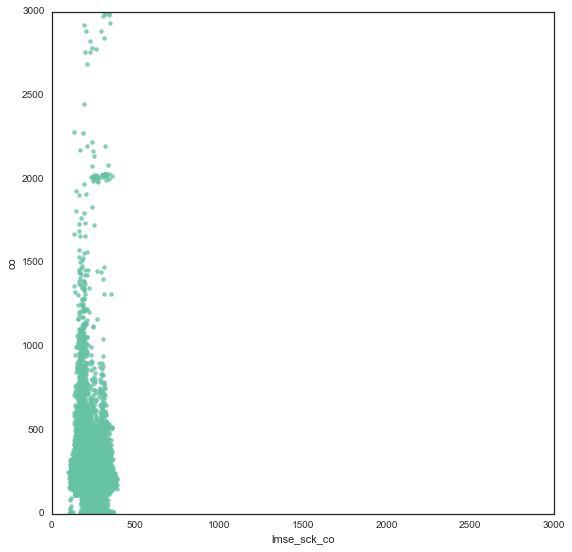

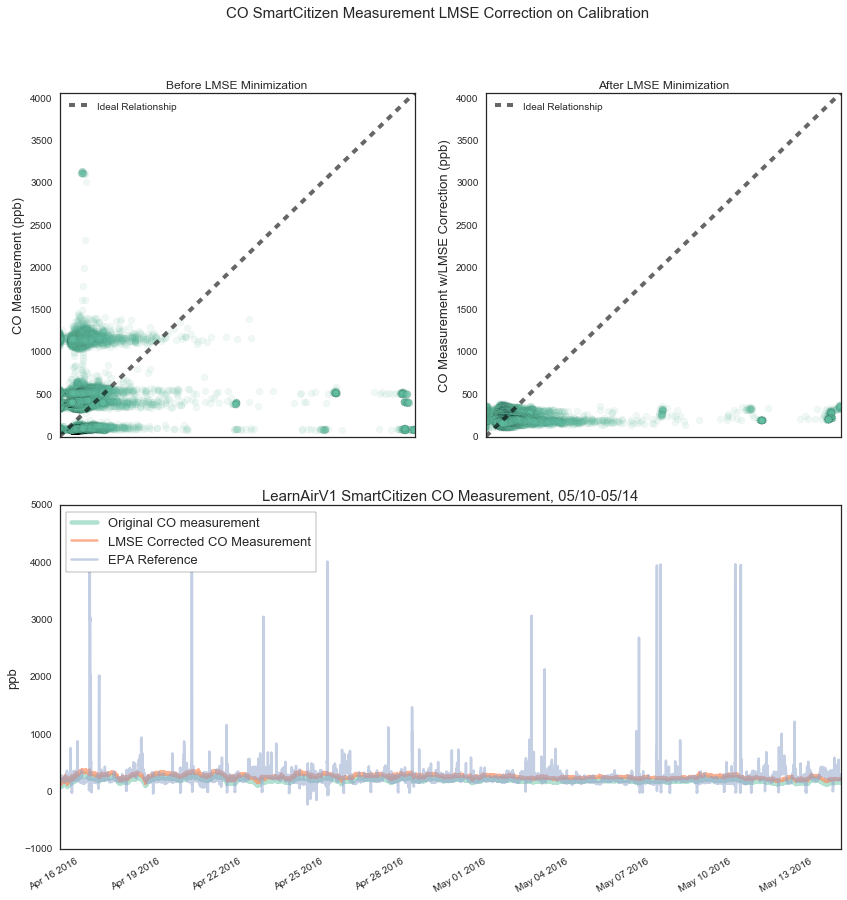

In [89]:
#8 LMSE RE-CAL SMARTCITIZEN DATA 

#RMS fit - scale factor and offset

#find a,b where we minimize sqrt( sum((a*scaled_ws+b)-ws)^2 / n ), same as minimzing sum((a*scaled_ws+b)-ws)^2 

ref_col = 'co'
scaled_col = 'Carbon Monxide ( kOhm)'
new_col = 'lmse_sck_co'

import math
from scipy.optimize import minimize

total_rmse = math.sqrt( np.nansum((df[scaled_col].values - df[ref_col].values)**2) / len(df) )

def minimize_me(x):
    return np.nansum(( (math.e**x[2])*(x[0]*df[scaled_col].values + x[1]) - df[ref_col].values)**2)

x0 = np.array([10.,200.,1.])
bnds = ((2, 20), (-1000, 1000), (0,10))

res2 = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'xtol': 1e-8, 'disp': True})
print('COBYLA minimization= %s\n' % res2.x)

res = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res.x)

res3 = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res3.x)

df[new_col] = (math.e**res2.x[2])*(df[scaled_col]*res2.x[0]+res2.x[1])


fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(scaled_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,3000)
plt.xlim(0,3000)


total_rmse = math.sqrt( np.nansum((df[scaled_col].values - df[ref_col].values)**2) / len(df) )
print 'original rmse = %s' % total_rmse

fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(new_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,3000)
plt.xlim(0,3000)

total_rmse = math.sqrt( np.nansum((df[new_col].values - df[ref_col].values)**2) / len(df) )
print 'after optimization rmse = %s' % total_rmse



   
xmin=0
xmax=df.loc[:as_breaktime, ref_col].max()

#fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(14,6))
fig = plt.figure(figsize=(14,15))
ax1 = plt.subplot2grid((2,2), (0,0))
ax2 = plt.subplot2grid((2,2), (0,1))
ax3 = plt.subplot2grid((2,2), (1,0), colspan=2)

plt.sca(ax1)
sns.regplot(ref_col, 'as_co', data=df, ax=ax1, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('CO Measurement (ppb)', fontsize=13)
plt.xlabel('EPA CO Measurement (ppb)', fontsize=13)
plt.title('Before LMSE Minimization')

plt.sca(ax2)
sns.regplot(ref_col, new_col, data=df, ax=ax2, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('CO Measurement w/LMSE Correction (ppb)', fontsize=13)
plt.xlabel('EPA CO Measurement (ppb)', fontsize=13)
plt.title('After LMSE Minimization')

fig.suptitle('CO SmartCitizen Measurement LMSE Correction on Calibration', fontsize=15)



starttime = datetime.datetime(2016,4,15)
endtime = datetime.datetime(2016,5,14)

value1 = 'Carbon Monxide ( kOhm)'
value2 = 'lmse_sck_co'
value3 = 'co'

#fig = plt.figure(figsize=(12, 9))  
#ax = plt.subplot(111)  
plt.sca(ax3)
fig.autofmt_xdate()
ax3.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, tz=localtz, ls='solid', marker=None, lw=4.5, alpha=.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values, lw=2.5, alpha=0.7)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value3].values, lw=2.5, alpha=0.5)
    
plt.legend(['Original CO measurement', 'LMSE Corrected CO Measurement', 'EPA Reference'], fontsize=13, loc=2, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 SmartCitizen CO Measurement, 05/10-05/14', fontsize=15)

plt.savefig('./figs/sck_co_lmse.png', bbox_inches='tight', dpi=200)


In [111]:
# CREATE 7.5% ACCURACY COLUMN FOR ALPHASENSE CO SET #1 and #2

#highlight sections of plot where calibrated values are worse than percent_tol% of total range off from epa vals
main_col = 'lmse_calib_as_co'
ref_col = 'co'
accurate_col = 'as_co_compare_accurate_7p5_percent'

tolerance = 0.075 #within 7.5 percent of full range of values is considered 'accurate' 
abs_tol = (tolerance * df[ref_col].max()) / 2.0

df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]

print '--'
print main_col + ' vs ' + ref_col + ' with ' + str(tolerance) + ' tolerance'
print 'maxval= ' + str(df[ref_col].max())
print 'actual tolerance value, +-, is ' + str(abs_tol)
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df) - df[accurate_col].sum())
print 'correct reading percentage= %s' % (df[accurate_col].sum()/float(len(df)))

print 'correct readings AS1= %s' % df.ix[:as_breaktime][accurate_col].sum()
print 'incorrect readings AS1= %s' % (len(df.ix[:as_breaktime]) - df.ix[:as_breaktime][accurate_col].sum())
print 'correct reading percentage AS1= %s' % (df.ix[:as_breaktime][accurate_col].sum()/float(len(df.ix[:as_breaktime])))

print 'correct readings AS2= %s' % df.ix[as_breaktime:][accurate_col].sum()
print 'incorrect readings AS2= %s' % (len(df.ix[as_breaktime:]) - df.ix[as_breaktime:][accurate_col].sum())
print 'correct reading percentage AS2= %s' % (df.ix[as_breaktime:][accurate_col].sum()/float(len(df.ix[as_breaktime:])))






#highlight sections of plot where calibrated values are worse than percent_tol% of total range off from epa vals
main_col = 'avg_15_lmse_calib_as_co'
ref_col = 'co'
accurate_col = 'avg_15_as_co_compare_accurate_7p5_percent'

tolerance = 0.075 #within 7.5 percent of full range of values is considered 'accurate' 
abs_tol = (tolerance * df[ref_col].max()) / 2.0

df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]

print '--'
print main_col + ' vs ' + ref_col + ' with ' + str(tolerance) + ' tolerance'
print 'maxval= ' + str(df[ref_col].max())
print 'actual tolerance value, +-, is ' + str(abs_tol)
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df) - df[accurate_col].sum())
print 'correct reading percentage= %s' % (df[accurate_col].sum()/float(len(df)))

print 'correct readings AS1= %s' % df.ix[:as_breaktime][accurate_col].sum()
print 'incorrect readings AS1= %s' % (len(df.ix[:as_breaktime]) - df.ix[:as_breaktime][accurate_col].sum())
print 'correct reading percentage AS1= %s' % (df.ix[:as_breaktime][accurate_col].sum()/float(len(df.ix[:as_breaktime])))

print 'correct readings AS2= %s' % df.ix[as_breaktime:][accurate_col].sum()
print 'incorrect readings AS2= %s' % (len(df.ix[as_breaktime:]) - df.ix[as_breaktime:][accurate_col].sum())
print 'correct reading percentage AS2= %s' % (df.ix[as_breaktime:][accurate_col].sum()/float(len(df.ix[as_breaktime:])))






#highlight sections of plot where calibrated values are worse than percent_tol% of total range off from epa vals
main_col = 'lmse_sck_co'
ref_col = 'co'
accurate_col = 'sck_co_compare_accurate_7p5_percent'

tolerance = 0.075 #within 7.5 percent of full range of values is considered 'accurate' 
abs_tol = (tolerance * df[ref_col].max()) / 2.0

df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]

print '--'
print main_col + ' vs ' + ref_col + ' with ' + str(tolerance) + ' tolerance'
print 'maxval= ' + str(df[ref_col].max())
print 'actual tolerance value, +-, is ' + str(abs_tol)
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df) - df[accurate_col].sum())
print 'correct reading percentage= %s' % (df[accurate_col].sum()/float(len(df)))





#~150 is close to the quantization error we expect, a good choice

--
lmse_calib_as_co vs co with 0.075 tolerance
maxval= 4220.64
actual tolerance value, +-, is 158.274
correct readings= 67353
incorrect readings = 18386
correct reading percentage= 0.7855584973
correct readings AS1= 43545
incorrect readings AS1= 12044
correct reading percentage AS1= 0.783338430265
correct readings AS2= 23808
incorrect readings AS2= 6342
correct reading percentage AS2= 0.789651741294
--
avg_15_lmse_calib_as_co vs co with 0.075 tolerance
maxval= 4220.64
actual tolerance value, +-, is 158.274
correct readings= 67489
incorrect readings = 18250
correct reading percentage= 0.78714470661
correct readings AS1= 43768
incorrect readings AS1= 11821
correct reading percentage AS1= 0.787350015291
correct readings AS2= 23721
incorrect readings AS2= 6429
correct reading percentage AS2= 0.786766169154
--
lmse_sck_co vs co with 0.075 tolerance
maxval= 4220.64
actual tolerance value, +-, is 158.274
correct readings= 68039
incorrect readings = 17700
correct reading percentage= 0.79355952

In [112]:
# CREATE 5% ACCURACY COLUMN FOR ALPHASENSE CO SET #1 and #2

#highlight sections of plot where calibrated values are worse than percent_tol% of total range off from epa vals
main_col = 'lmse_calib_as_co'
ref_col = 'co'
accurate_col = 'as_co_compare_accurate_5_percent'

tolerance = 0.05 #within 5 percent of full range of values is considered 'accurate' 
abs_tol = (tolerance * df[ref_col].max()) / 2.0

df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]

print '--'
print main_col + ' vs ' + ref_col + ' with ' + str(tolerance) + ' tolerance'
print 'maxval= ' + str(df[ref_col].max())
print 'actual tolerance value, +-, is ' + str(abs_tol)
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df) - df[accurate_col].sum())
print 'correct reading percentage= %s' % (df[accurate_col].sum()/float(len(df)))

print 'correct readings AS1= %s' % df.ix[:as_breaktime][accurate_col].sum()
print 'incorrect readings AS1= %s' % (len(df.ix[:as_breaktime]) - df.ix[:as_breaktime][accurate_col].sum())
print 'correct reading percentage AS1= %s' % (df.ix[:as_breaktime][accurate_col].sum()/float(len(df.ix[:as_breaktime])))

print 'correct readings AS2= %s' % df.ix[as_breaktime:][accurate_col].sum()
print 'incorrect readings AS2= %s' % (len(df.ix[as_breaktime:]) - df.ix[as_breaktime:][accurate_col].sum())
print 'correct reading percentage AS2= %s' % (df.ix[as_breaktime:][accurate_col].sum()/float(len(df.ix[as_breaktime:])))



#highlight sections of plot where calibrated values are worse than percent_tol% of total range off from epa vals
main_col = 'avg_15_lmse_calib_as_co'
ref_col = 'co'
accurate_col = 'avg_15_as_co_compare_accurate_5_percent'

tolerance = 0.05 #within 5 percent of full range of values is considered 'accurate' 
abs_tol = (tolerance * df[ref_col].max()) / 2.0

df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]

print '--'
print main_col + ' vs ' + ref_col + ' with ' + str(tolerance) + ' tolerance'
print 'maxval= ' + str(df[ref_col].max())
print 'actual tolerance value, +-, is ' + str(abs_tol)
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df) - df[accurate_col].sum())
print 'correct reading percentage= %s' % (df[accurate_col].sum()/float(len(df)))

print 'correct readings AS1= %s' % df.ix[:as_breaktime][accurate_col].sum()
print 'incorrect readings AS1= %s' % (len(df.ix[:as_breaktime]) - df.ix[:as_breaktime][accurate_col].sum())
print 'correct reading percentage AS1= %s' % (df.ix[:as_breaktime][accurate_col].sum()/float(len(df.ix[:as_breaktime])))

print 'correct readings AS2= %s' % df.ix[as_breaktime:][accurate_col].sum()
print 'incorrect readings AS2= %s' % (len(df.ix[as_breaktime:]) - df.ix[as_breaktime:][accurate_col].sum())
print 'correct reading percentage AS2= %s' % (df.ix[as_breaktime:][accurate_col].sum()/float(len(df.ix[as_breaktime:])))






#highlight sections of plot where calibrated values are worse than percent_tol% of total range off from epa vals
main_col = 'lmse_sck_co'
ref_col = 'co'
accurate_col = 'sck_co_compare_accurate_5_percent'

tolerance = 0.05 #within 5 percent of full range of values is considered 'accurate' 
abs_tol = (tolerance * df[ref_col].max()) / 2.0

df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]

print '--'
print main_col + ' vs ' + ref_col + ' with ' + str(tolerance) + ' tolerance'
print 'maxval= ' + str(df[ref_col].max())
print 'actual tolerance value, +-, is ' + str(abs_tol)
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df) - df[accurate_col].sum())
print 'correct reading percentage= %s' % (df[accurate_col].sum()/float(len(df)))





#~150 is close to the quantization error we expect, a good choice

--
lmse_calib_as_co vs co with 0.05 tolerance
maxval= 4220.64
actual tolerance value, +-, is 105.516
correct readings= 47523
incorrect readings = 38216
correct reading percentage= 0.554275183989
correct readings AS1= 27119
incorrect readings AS1= 28470
correct reading percentage AS1= 0.487848315314
correct readings AS2= 20404
incorrect readings AS2= 9746
correct reading percentage AS2= 0.676749585406
--
avg_15_lmse_calib_as_co vs co with 0.05 tolerance
maxval= 4220.64
actual tolerance value, +-, is 105.516
correct readings= 47991
incorrect readings = 37748
correct reading percentage= 0.559733610142
correct readings AS1= 27619
incorrect readings AS1= 27970
correct reading percentage AS1= 0.496842900574
correct readings AS2= 20372
incorrect readings AS2= 9778
correct reading percentage AS2= 0.675688225539
--
lmse_sck_co vs co with 0.05 tolerance
maxval= 4220.64
actual tolerance value, +-, is 105.516
correct readings= 57104
incorrect readings = 28635
correct reading percentage= 0.66602129

"\nfig = plt.figure(figsize=(12, 9))  \nax = plt.subplot(111)  \nfig.autofmt_xdate()\nax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')\n\nplt.plot_date(df.index.values, df[val1].values, tz=localtz, ls='solid', marker=None, lw=2.5)\nplt.plot(df.index.values, df[val2].values, lw=2.5, alpha=0.7)\n\naccurate_axis = df[accurate_col]*df[ref_col].max()*2\nax.fill_between(df.index.values, 0, accurate_axis, color='green', alpha=0.1)\n\nplt.ylim(0,df[ref_col].max()*1.05)\n\nplt.legend(['LMSE Corrected 30min Avg Pressure Windspeed','30min Avg EPA Windspeed', '$\\pm$5% Accuracy'], fontsize=13, loc=1, frameon=True)\nplt.ylabel('Windspeed (m/s)', fontsize=12)\nplt.title('30min Avg LearnAirV1 Windspeed Measurement, 4/15-06/13', fontsize=15)\nplt.savefig('./figs/as_co_with_7p5_accuracy.png', bbox_inches='tight', dpi=200)\n"

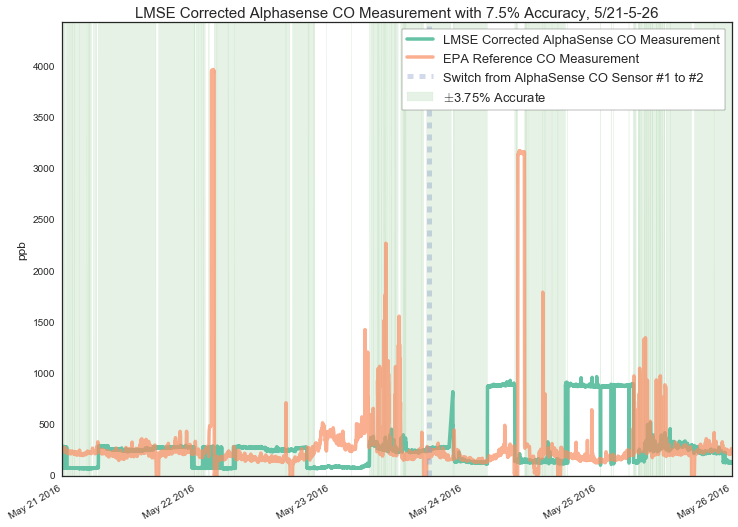

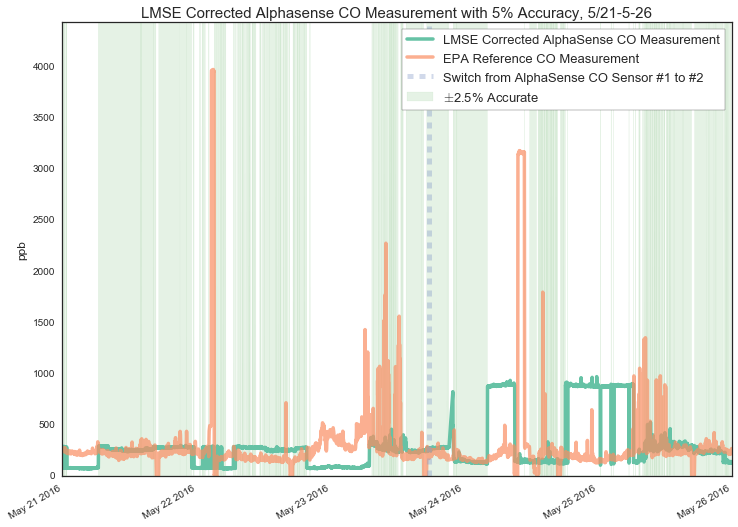

In [118]:
#plot Alphasense LMSE corrected against the real values, with accuracy in background
'''
'avg_15_lmse_calib_as_co'
'lmse_calib_as_co'
'lmse_sck_co'
'''
#color green where we're 'accurate'

starttime = datetime.datetime(2016,5,21)
endtime = datetime.datetime(2016,5,26)
val1 = 'lmse_calib_as_co'
val2 = 'co'
accurate_col = 'as_co_compare_accurate_7p5_percent'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  
fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][val1].values, tz=localtz, ls='solid', marker=None, lw=3.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][val2].values, lw=3.5, alpha=0.7)

accurate_axis = df.ix[starttime: endtime][accurate_col]*df[ref_col].max()*2
ax.fill_between(df.ix[starttime:endtime].index.values, 0, accurate_axis, color='green', alpha=0.1)

plt.plot([as_breaktime,as_breaktime], [0,df[ref_col].max()*2], linestyle='dashed', lw=5, alpha=0.4)


plt.ylim(0,df[ref_col].max()*1.05)

plt.legend(['LMSE Corrected AlphaSense CO Measurement','EPA Reference CO Measurement', 'Switch from AlphaSense CO Sensor #1 to #2', '$\pm$3.75% Accurate'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=12)
plt.title('LMSE Corrected Alphasense CO Measurement with 7.5% Accuracy, 5/21-5-26', fontsize=15)
plt.savefig('./figs/as_co_with_7p5_accuracy_zoomed.png', bbox_inches='tight', dpi=200)





starttime = datetime.datetime(2016,5,21)
endtime = datetime.datetime(2016,5,26)
val1 = 'lmse_calib_as_co'
val2 = 'co'
accurate_col = 'as_co_compare_accurate_5_percent'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  
fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][val1].values, tz=localtz, ls='solid', marker=None, lw=3.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][val2].values, lw=3.5, alpha=0.7)

accurate_axis = df.ix[starttime: endtime][accurate_col]*df[ref_col].max()*2
ax.fill_between(df.ix[starttime:endtime].index.values, 0, accurate_axis, color='green', alpha=0.1)

plt.plot([as_breaktime,as_breaktime], [0,df[ref_col].max()*2], linestyle='dashed', lw=5, alpha=0.4)


plt.ylim(0,df[ref_col].max()*1.05)

plt.legend(['LMSE Corrected AlphaSense CO Measurement','EPA Reference CO Measurement', 'Switch from AlphaSense CO Sensor #1 to #2', '$\pm$2.5% Accurate'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=12)
plt.title('LMSE Corrected Alphasense CO Measurement with 5% Accuracy, 5/21-5-26', fontsize=15)
plt.savefig('./figs/as_co_with_5_accuracy_zoomed.png', bbox_inches='tight', dpi=200)


'''
fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  
fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.index.values, df[val1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
plt.plot(df.index.values, df[val2].values, lw=2.5, alpha=0.7)

accurate_axis = df[accurate_col]*df[ref_col].max()*2
ax.fill_between(df.index.values, 0, accurate_axis, color='green', alpha=0.1)

plt.ylim(0,df[ref_col].max()*1.05)

plt.legend(['LMSE Corrected 30min Avg Pressure Windspeed','30min Avg EPA Windspeed', '$\pm$5% Accuracy'], fontsize=13, loc=1, frameon=True)
plt.ylabel('Windspeed (m/s)', fontsize=12)
plt.title('30min Avg LearnAirV1 Windspeed Measurement, 4/15-06/13', fontsize=15)
plt.savefig('./figs/as_co_with_7p5_accuracy.png', bbox_inches='tight', dpi=200)
'''




"\nfig = plt.figure(figsize=(12, 9))  \nax = plt.subplot(111)  \nfig.autofmt_xdate()\nax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')\n\nplt.plot_date(df.index.values, df[val1].values, tz=localtz, ls='solid', marker=None, lw=2.5)\nplt.plot(df.index.values, df[val2].values, lw=2.5, alpha=0.7)\n\naccurate_axis = df[accurate_col]*df[ref_col].max()*2\nax.fill_between(df.index.values, 0, accurate_axis, color='green', alpha=0.1)\n\nplt.ylim(0,df[ref_col].max()*1.05)\n\nplt.legend(['LMSE Corrected 30min Avg Pressure Windspeed','30min Avg EPA Windspeed', '$\\pm$ 5% Accuracy'], fontsize=13, loc=1, frameon=True)\nplt.ylabel('Windspeed (m/s)', fontsize=12)\nplt.title('30min Avg LearnAirV1 Windspeed Measurement, 4/15-06/13', fontsize=15)\nplt.savefig('./figs/as_co_with_7p5_accuracy.png', bbox_inches='tight', dpi=200)\n"

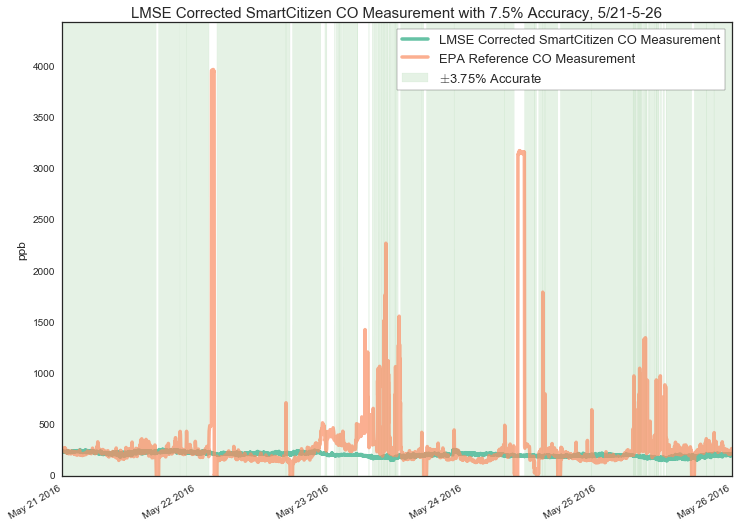

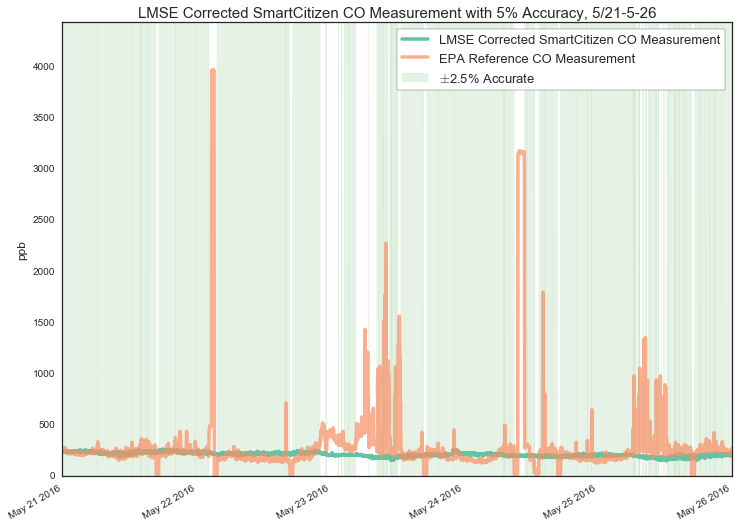

In [119]:
#plot Alphasense LMSE corrected against the real values, with accuracy in background
'''
'avg_15_lmse_calib_as_co'
'lmse_calib_as_co'
'lmse_sck_co'
'''
#color green where we're 'accurate'

starttime = datetime.datetime(2016,5,21)
endtime = datetime.datetime(2016,5,26)
val1 = 'lmse_sck_co'
val2 = 'co'
accurate_col = 'sck_co_compare_accurate_7p5_percent'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  
fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][val1].values, tz=localtz, ls='solid', marker=None, lw=3.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][val2].values, lw=3.5, alpha=0.7)

accurate_axis = df.ix[starttime: endtime][accurate_col]*df[ref_col].max()*2
ax.fill_between(df.ix[starttime:endtime].index.values, 0, accurate_axis, color='green', alpha=0.1)

plt.ylim(0,df[ref_col].max()*1.05)

plt.legend(['LMSE Corrected SmartCitizen CO Measurement','EPA Reference CO Measurement', '$\pm$3.75% Accurate'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=12)
plt.title('LMSE Corrected SmartCitizen CO Measurement with 7.5% Accuracy, 5/21-5-26', fontsize=15)
plt.savefig('./figs/sck_co_with_7p5_accuracy_zoomed.png', bbox_inches='tight', dpi=200)





starttime = datetime.datetime(2016,5,21)
endtime = datetime.datetime(2016,5,26)
val1 = 'lmse_sck_co'
val2 = 'co'
accurate_col = 'sck_co_compare_accurate_5_percent'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  
fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][val1].values, tz=localtz, ls='solid', marker=None, lw=3.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][val2].values, lw=3.5, alpha=0.7)

accurate_axis = df.ix[starttime: endtime][accurate_col]*df[ref_col].max()*2
ax.fill_between(df.ix[starttime:endtime].index.values, 0, accurate_axis, color='green', alpha=0.1)


plt.ylim(0,df[ref_col].max()*1.05)

plt.legend(['LMSE Corrected SmartCitizen CO Measurement','EPA Reference CO Measurement', '$\pm$2.5% Accurate'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=12)
plt.title('LMSE Corrected SmartCitizen CO Measurement with 5% Accuracy, 5/21-5-26', fontsize=15)
plt.savefig('./figs/sck_co_with_5_accuracy_zoomed.png', bbox_inches='tight', dpi=200)


'''
fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  
fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.index.values, df[val1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
plt.plot(df.index.values, df[val2].values, lw=2.5, alpha=0.7)

accurate_axis = df[accurate_col]*df[ref_col].max()*2
ax.fill_between(df.index.values, 0, accurate_axis, color='green', alpha=0.1)

plt.ylim(0,df[ref_col].max()*1.05)

plt.legend(['LMSE Corrected 30min Avg Pressure Windspeed','30min Avg EPA Windspeed', '$\pm$ 5% Accuracy'], fontsize=13, loc=1, frameon=True)
plt.ylabel('Windspeed (m/s)', fontsize=12)
plt.title('30min Avg LearnAirV1 Windspeed Measurement, 4/15-06/13', fontsize=15)
plt.savefig('./figs/as_co_with_7p5_accuracy.png', bbox_inches='tight', dpi=200)
'''




In [ ]:
#don't forget the justification that 300ppb (plus/minus 150ppb, which is what we're using here with 7.5%) is motivated
#by quantization level in previous steps

In [120]:
#10 RESAVE

df.to_pickle('full_mlarray.pkl')

#added EPA co, EPA o3, lmse corrected sck, as1, and as2 CO, and 5%/7.5% accuracy columns

#for machine learning, using: 

'''
sck_co_compare_accurate_5_percent
sck_co_compare_accurate_7p5_percent
as_co_compare_accurate_5_percent
as_co_compare_accurate_7p5_percent
avg_15_as_co_compare_accurate_5_percent
avg_15_as_co_compare_accurate_7p5_percent
'''

'\nsck_co_compare_accurate_5_percent\nsck_co_compare_accurate_7p5_percent\nas_co_compare_accurate_5_percent\nas_co_compare_accurate_7p5_percent\navg_15_as_co_compare_accurate_5_percent\navg_15_as_co_compare_accurate_7p5_percent\n'

In [ ]:
#says on datasheet ppm, we're in ppb here 1ppm=1000ppb.  